# Density Functional Theory (DFT)

Before we start our discussion on density functional theory, let's first recap what we developed so far in quantum chemistry. Our goal is to solve the time-independent Schrodinger's equation:
\begin{align}
\hat{H} | \psi \rangle &= E | \psi \rangle
\end{align}
Solving this equation entails finding the energy and the wavefunction of the system. To solve this equation, we introduced the Hartree-Fock trial wavefunction, the single Slater determinant, which neglects the correlated motion of the electrons. Solving the Hartree-Fock equations, we obtain the molecular orbitals and the Hartree-Fock energy. After that, to account for the neglected electron correlation, we introduced a variety of post-Hartree-Fock methods. While some of these methods can be improved systematically, they are very computationally expensive. Furthermore, conceptually, the wavefunction, which is constructed from the molecular orbitals, is an extremely complex and unintuitive object, and it is not even a physical observable.

## The Conceptual Ground of DFT
The wavefunction $\Psi$ of $N$-electron system is a complex function that depends on $4N$ variables, three spatial coordinates and one spin coordinate for each electron. By contrast, the electron density, which is an observable physical quantity, is a simpler function that only depends on the three spatial coordinates regardless of the number of electrons.

The conceptual breakthrough of DFT is its recognition that the energy of the system can be exactly expressed as a *functional* of the density. A functional is simply a function of a function (e.g., the energy is a function of the density, which in turn is a function of the spatial coordinates). Why is this possible? The electron density encodes all information about the system:
- The integral of the electron density is equal to the number of electrons.
- The maxima of the electron density identify the positions of the nuclei.
- The heights of the maxima of the electron density identify the nuclear charge.
The surprisingly simple proof for this was discovered by Hohenberg and Kohn (The Hohenberg-Kohn existence theorem).

Given the above existence theorem, how can we find the correct electron density? The second Hohenberg-Kohn theorem provides the mathematical basis. Just like the wavefunction, the electron density also obeys the variational principle. The energy obtained from any trial density is an upper bound for the true energy. Thus, we can try to find the electron density that minimizes the energy. This is not a simple minimization as the density need to satisfy certain constraints. For example, the given density should integrate to the correct number of electrons.

The challenge in DFT is how to define the energy as a functional of the electron density.

## The Energy Functional Components
Consider again the Hamiltonian for multi-electron systems:
\begin{align}
\hat{H} = -\sum_{i=1}^{N} \frac{1}{2} \nabla^2_i
          -\sum_{A=1}^{M} \frac{1}{2 M_A} \nabla^2_A
          -\sum_{i=1}^{N} \sum_{A=1}^{M} \frac{Z_A}{r_{iA}}
          +\sum_{i=1}^{N} \sum_{j>i}^{N} \frac{1}{r_{ij}}
          +\sum_{A=1}^{M} \sum_{B>A}^{M} \frac{Z_A Z_B}{R_{AB}} 
          ,
\end{align}
Within the Born-Oppenheimer approximation, the second term (kinetic energy of nuclei) is zero, and the last term is constant. Thus, the electronic Hamiltonian can be expressed as:
\begin{align}
\hat{H}_{e} = \hat{T}_e(\textbf{r})
              + \hat{V}_{eN}(\textbf{r}; \textbf{R})
              + \hat{V}_{ee}(\textbf{r})
\end{align}

Given this Hamiltonian, it is clear that the energy funtional of the density can be written as a sum of separate components:
\begin{align}
E[\rho] = T[\rho] + E_{\rm ne}[\rho] + E_{ee}[\rho],
\end{align}
where the first term is the kinetic energy functional, the second term is the functional for the interaction between the electrons and th external potential (nuclei), and the third term is the functional for the electron-electron repulsion.

How do we define these separate terms? The second term is easy; it can be written using the classical expression:
\begin{align}
E_{\rm ne}[\rho(\textbf{r})] = \sum_k^{\rm nuclei} \int \frac{Z_k}{| \textbf{r}-\textbf{r}_k |} \rho(\textbf{r}) d \textbf{r}.
\end{align}

The other terms are more challenging. The general form for the kinetic energy functional is unknown and the trouble is that the kinetic energy is large in magnitude. The form for the kinetic energy functional was derived for a few simple cases. For example, Thomas and Fermi derived the expression for the kinetic energy for a uniform electron gas:
\begin{align}
T_{\rm TF}[\rho] = \frac{3}{10} (3 \pi^2)^{2/3} \int \rho^{5/3} (\textbf{r}) d\textbf{r}.
\end{align}
While the Thomas-Fermi functional is useful for describing valence electrons in metals, it fails to predict bonding in molecules. Developing accurate kinetic energy functionals is an active area of research. 

What about the electron-electron interaction functional? A portion of electron-electron interaction can be calculated using the classical Coulombic expression for the interaction of a charge density with itself:
\begin{align}
J[\rho(\textbf{r})] = \frac{1}{2} \int \int \frac{\rho(\textbf{r}_1) \rho(\textbf{r}_2))}{| \textbf{r}_1-\textbf{r}_2 |}  d \textbf{r}_1 d \textbf{r}_2.
\end{align}

However, we know that this is not sufficient. For example, for a one-electron system (e.g., hydrogen), the electron-electron repulsion should obviously be zero. However, the above classical electrostatic term is not zero. An *exchange* term is needed to cancel this self-interaction and to account for the antisymmetry of the electrons. Furthermore, a *correlation* term is also needed to account for any missing electron-electron interaction not included in the classical expression.

An early form for the exchange functional was proposed by Bloch and Dirac and also by Slater:
\begin{align}
E_{\rm x}[\rho(\textbf{r})] = -\frac{9 \alpha}{8} (\frac{3}{\pi})^{1/3} \int \rho^{4/3} (\textbf{r}) d\textbf{r},
\end{align}
where $\alpha=2/3$ for Dirac exchange and $\alpha=1$ for Slater exchange. The Dirca exchange functional, combined with the Thomas-Fermi kinetic energy functional and the Coulomb functional, defines the famous Thomas-Fermi-Dirac model.

Given a form for the kinetic enrergy and exchange-correlation functionals, the energy can be minimized with respect to the electron density. This is the basis for **orbital-free DFT** method. However, given the lack of accurate kinetic energy functionals, orbital-free DFT has not still enjoyed wide-spread use. The most common scheme for calculating the energy in DFT was proposed by Kohn and Sham, and it is called **Kohn-Sham DFT**.

## Kohn-Sham DFT

Orbital-free DFT lacks accurate kinetic energy functionals. The Kohn-Sham approach solves this problem by dividing the kinetic energy to two terms: A large term that can be calculated exactly and a small correction term. What is a good estimate of the kinetic energy? In Hartree-Fock theory, the kinetic energy for non-interacting electrons can be calculated exactly from the Slater determinant wavefunction. Kohn-Sham DFT, therefore, reintroduce the one-electron orbitals and calculate the kinetic energy. The advantage of this approach is that most of the kinetic energy is estimated correctly from the orbitals. The disadvantage is that the orbitals are reintroduced and thus the complexity increases from 3 variables for the density to $3N$ variables for the orbitals. From the orbitals, the electron density can be simply calculated as:
\begin{align}
    \rho = \sum_i^N \langle \chi_i | \chi_i \rangle.
\end{align}

In the Kohn-Sham DFT, the energy functional is given by:
\begin{align}
    E_{\rm DFT}[\rho] = T_{\rm S}[\rho] + E_{\rm ne}[\rho] + J[\rho] + E_{\rm xc}[\rho],
\end{align}
where $T_S[\rho]$ is the kinetic energy estimated from the Slater determinant, and $E_{xc}[\rho]$ is called the **exchange-correlation functional**. The exchange-correlation functional is *defined* as follows:
\begin{align}
    E_{\rm xc}[\rho] = (T[\rho] - T_{\rm S}[\rho]) + (E_{\rm ee}[\rho] - J[\rho]).
\end{align}
That is, the exchange-correlation functional corrects for the missing kinetic energy contribution, and corrects for the missing electron-electron interaction not captured by the classical Coulomb term. Furthermore, the exchange-correlation functional is often divided to an exchange functional and a correlation functional:
\begin{align}
    E_{\rm xc}[\rho] = E_{\rm x}[\rho] + E_{\rm c}[\rho]
\end{align}
The challenging task in Kohn-Sham DFT is to find the exchange-correlation functional.

The Kohn-Sham DFT equations are very similar to the Hartree-Fock equations. We need to solve the eigenvalue equation:
\begin{align}
    h_i^{\rm KS} \chi_i = \epsilon_i \chi_i ,
\end{align}
where the Kohn-Sham one-electron operator is given by:
\begin{align}
    h_i^{\rm KS} = -\frac{1}{2} \nabla_i^2 - \sum_k^{\rm nuclei} \frac{Z_k}{|\textbf{r}_i - \textbf{r}_k|} +
                   \int \frac{\rho(\textbf{r}^\prime)}{|\textbf{r}_i - \textbf{r}^\prime|} d \textbf{r}^\prime + V_{\rm xc}.
\end{align}
The only difference with the Hartree-Fock one-electron operator is the addition of $V_{xc}$. $V_{xc}$ is defines as the *functional derivative* of the exchange correlation functional:
\begin{align}
    V_{\rm xc} = \frac{\delta E_{\rm xc}}{\delta \rho}
\end{align}

Just like with Hartee-Fock theory, the molecular orbitals can be expanded in terms of an atomic orbital basis set. Then, the Kohn-Sham equations can be solved iteratively and the energy and the orbitals can be found.

DFT is formally an exact theory. If the *exact* exchange-correlation functional is used, the exact energy of the system can be calculated. The approximate nature of DFT arises from *approximation* for the exchange-correlation functional. By contrast, Hartree-Fock theory is an *approximate* model that can be solved *exactly*.

## Advantages and Disadvantages of DFT
DFT enjoyed a very wide-spread success. The main reason is that it is computationally efficient compared to correlated post-Hartree-Fock method. At the same time, it is usually more accurate than Hartree-Fock theory because it incorporates electron correlation effects in the correlation functional.

The computational cost of DFT varies based on the specific form. Some DFT methods are faster than Hartree-Fock because they incorporate an approximate exchange functional that is cheaper than the exact Hartree-Fock exchange. By contrast, some DFT methods are more expensive than Hartree-Fock theory, but DFT is generally less computationally expensive compared to correlated *ab initio* methods. 

The main disadvatage of the DFT approach is that it is not very clear how to systematically improve the DFT approximations to approach the exact answer. While there is a hierarchy of exchange-correlation functionals as discussed below, it is not guranteed that the energy will improve by using a higher-order functional. Furthermore, approximate DFT is not variational and therefore the energy cannot be systematically improved by approaching the basis set limit.

Another disadvantage of approximate DFT is that the exchange-correlation functionals usually contain some parameters that are fitted to experimental or computational data. Therefore, unlike *ab initio* post-Hartree-Fock methods, approximate DFT is usually not completely from first principle.

## Hierarchy of Exchange-Correlation Functionals

A large number of exchange-correlation functionals have been developed, and this is still an active area of research. Ideally, careful analysis of the performance of a given DFT functional for the calculation of a given property should be undertaken before performing a calculation. Analysis and benchmarking of the performance of DFT functionals continues to be available in the literature.

Despite its large variety, DFT functionals can be classified based on the information needed for computing the exchange-correlation energy into the following categories:
- Local (spin) density approximation (LDA or LSDA): Functional depends on the local density at a given point.
- Generalized gradient approximation (GGA): Functional depends on the local density and its gradient at a given point.
- Meta-GGA: Functional depends on the local density, its gradient, and its Laplacian, at a given point.
- Hybrid functionals: The functional incorporates (part of) the Hartree-Fock exchange.

Some other specialized DFT functionals aim to address known limitations or challenges of DFT methods. For example, standard DFT methods fail to account for London dispersion forces, and therefore specialized dispersion-corrected functionals have been developed to address this issue. 

## The DFT Grid: A Technical Point
DFT exchange-correlation functionals depend on the density and possibly other parameters. Unlike the other energy component, there is no analytical formula to evaluate the needed integrals for the exchange-correlation part. Therefore, the exchange-correlation energy is estimated in DFT using numerical integration given a grid of points around each atom in the molecule. The accuracy of the integration depends on the number and distribution of grid points. However, the speed of the calculation decreases with the increase in the number of grid points. Efficicent numerical grids are employed in DFT calculations and various techniques are used to lower the cost without compromising the accuracy. We will show below an example small grid for a single atom:

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry HE         line    32 file /home/alenaizan/miniconda3/envs/comp_chem/share/psi4/basis/cc-pvdz.gbs 



<IPython.core.display.Javascript object>


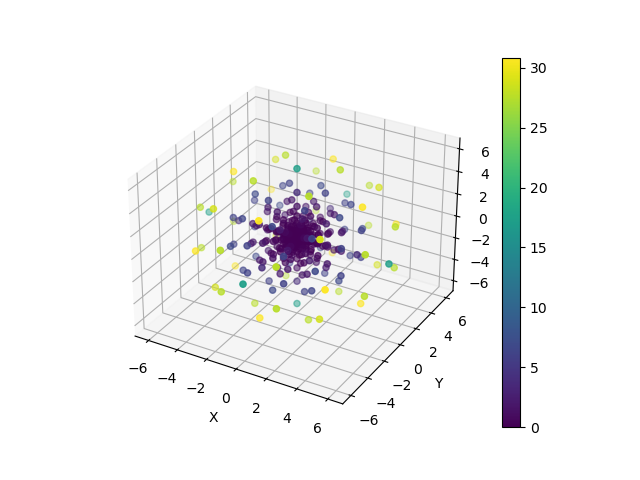

In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

mol = psi4.geometry("He")
psi4.set_options({'BASIS':                'CC-PVDZ',
                  'DFT_SPHERICAL_POINTS': 50,
                  'DFT_RADIAL_POINTS':    12})
basis = psi4.core.BasisSet.build(mol, "ORBITAL", "CC-PVDZ")
sup = psi4.driver.dft.build_superfunctional("PBE", True)[0]
Vpot = psi4.core.VBase.build(basis, sup, "RV")
Vpot.initialize()

x, y, z, w = Vpot.get_np_xyzw()
R = np.sqrt(x **2 + y ** 2 + z **2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, z, c=w, marker='o')
plt.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

psi4.core.clean_options()

## Local (Spin) Density Approximation (LDA)
In the local density approximation, the exchange correlation functional only depends on the density at a given point. The earliest example of this type of functionals came from the analysis of uniform electron gas. For example, the Dirac or Slater exchange mentioned above:
\begin{align}
    E_{\rm x}[\rho(\textbf{r})] = -\frac{9 \alpha}{8} (\frac{3}{\pi})^{1/3} \int \rho^{4/3} (\textbf{r}) d\textbf{r},
\end{align}
only depends on the density.

If the $\alpha$ and $\beta$ electron densities are not equal, the local spin density approximation is given by:
\begin{align}
    E_{\rm x}[\rho(\textbf{r})] = -\frac{9 \alpha}{8} (\frac{3}{\pi})^{1/3} \int \left ( \rho_{\alpha}^{4/3} + \rho_{\beta}^{4/3} \right ) (\textbf{r})
\end{align}

It should be noted here that a common convention is to express the energy functional as an interaction between the electron density $\rho$ and energy density $\epsilon_{\rm xc}$ that depends on the electron density:
\begin{align}
    E_{\rm xc}[\rho(\textbf{r})] = \int \rho(\textbf{r}) \epsilon_{\rm xc}[\rho(\textbf{r})] d \textbf{r}.
\end{align}
The electron density is per volume while the energy density is per particle. With this convention, the Dirac or Slater exchange energy density becomes:
\begin{align}
    \epsilon_{\rm x}[\rho(\textbf{r})] = -\frac{9 \alpha}{8} (\frac{3}{\pi})^{1/3} \rho^{1/3} (\textbf{r}).
\end{align}

What about the correlation functional? Surprisingly, no analytical formula has been derived even for a uniform electron gas. However, using quantum Monte Carlo computations, accurate estimates for the correlation energy of a uniform electron gas were established. Then, Vosko, Wilk, and Nusair designed correlation functionals fitted to these values, creating the VWN LDA correlation functionals. Combining Slater exchange with VWN correlation is referred to as the SVWN method.

The LDA approximation is not accurate enough for chemical applications. However, LDA is often used in the simulation of extended systems, such as metals, where the uniform electron gas approximation is more accurate.

### Example
In this example, we will illustrate how we can compute the Dirac exchange for helium atom using the above formula. First, we will optimize the density with the Psi4 program using the usual iterative self-consistent field procedure. We will only incorporate Dirac exchange and we will ignore correlation. From Psi4, we will get the value of the exchange energy using the optimized density. We will also calculate the value of the electron density in a rectangular grid around the atom. Then, we will calculate the exchange energy using our own implementation and using the same density. Finally, we will compare the Psi4 result with our own implementation.

In [2]:
import psi4
import numpy as np

psi4.core.set_output_file("output.dat", True)
molecule = psi4.geometry("""He""")

# Define the functional. We only use Dirac exchange here
functional = {
    "name": "Dirac",
    "x_functionals": {"LDA_X": {}},
    "c_functionals": {},
}

# Perform the self-consistent field procedure
e, wfn = psi4.energy("scf/cc-pvdz", dft_functional=functional, return_wfn=True)

# Exctract the value of the exchange energy from Psi4
psi4_exchange = wfn.variable("DFT XC ENERGY")

# Compute the density at a cubic grid
# We need a close spacing of the grid to more accurate values.
# The default spacing value is 0.2 Bohr
spacing = 0.1
psi4.set_options({"cubeprop_tasks": ['density'],
                  "cubic_grid_spacing": [spacing, spacing, spacing]
                 })
psi4.cubeprop(wfn)

# Define the exchange density
def exchange_density(rho, alpha=1.0):
    return -9.0*alpha/8.0* (3.0/np.pi)**(1.0/3.0) * rho**(1.0/3.0)

# read the cube file
cube_file = open("Dt.cube", "r").readlines()
nx = int(cube_file[3].split()[0]) # Number of x points
ny = int(cube_file[4].split()[0]) # Number of y points
nz = int(cube_file[5].split()[0]) # Number of z points

density = []
for i in range(7, len(cube_file)):
    line = cube_file[i].split()
    for value in line:
        value = value.strip("\n")
        density.append(float(value))

density = np.array(density).reshape(nx, ny, nz)
exchange_density_values = exchange_density(density, alpha=2.0/3.0)
integrand = density*exchange_density_values

# Integrate using np.trapz function
my_exchange = np.trapz(np.trapz(np.trapz(integrand, dx=spacing), dx=spacing), dx=spacing)

print("The value of the exchange energy computed with Psi is", psi4_exchange)
print("The value of the exchange energy that we computed is", my_exchange)
print("Are the energies close?", np.isclose(my_exchange, psi4_exchange))

The value of the exchange energy computed with Psi is -0.8629828648743846
The value of the exchange energy that we computed is -0.8629831721420624
Are the energies close? True


## Generalized Gradient Approximation (GGA)
The LDA approximation based on the uniform electron gas is clearly inappropriate for molecular systems. The electron density of molecular systems far from being uniform. The electron density is highest at the nuclei positions and decays far from the molecule. How do we account for the effect of the spatial variation in the density on the exchange-correlation energy? We can make the functional depend not only on the value of the density at a given point but also on the local change of the density, or its *gradient*.

One of the first examples for GGA exchange functionals is the B (or B88) functional developed by Becke. The form of the functional is:
\begin{align}
    \epsilon_{\rm x}^{\rm B88} &= \epsilon_{\rm x}^{\rm LDA} - \beta \rho^{1/3} \frac{x^2}{1 + 6 \beta x {\rm sinh}^{-1} x} \\
                             x &= \frac{|\nabla \rho|}{\rho^{4/3}},
\end{align}
where $\beta$ is a fitting parameter. The B88 functional has the correct asymptotic behavior for the energy
density and reduces the error in the exchange by two orders of magnitude compared to the LDA exchange. Other common exchange functionals are CAM and PW, which also contain fitting parameters. Some GGA exchange functionals, such as PBE and B88, do not contain fitting parameters.

GGA correlation functionals have also been developed. Some common functionals are the PW91 and LYP functionals.

The naming convention for DFT functionals is to combine the names of the exchange and correlation functional. For example, if the B exchange functional is combined with the LYP correlation functional, we obtain the BLYP correlation function, named after Becke, Lee, Yang, and Parr. 

## Meta-GGA
Following the same logic of the GGA functionals, the next step in improving the exchange-correlation functionals is to incorporate information from the Laplacian of the density. Alternatively, some meta-GGA functionals utilize the kinetic energy density $\tau$ defined as:
\begin{align}
    \tau (\textbf{r}) = \sum_i^{\rm occupied} \frac{1}{2} | \nabla \psi_1 (\textbf{r})|^2,
\end{align}
where the $\psi$ are the Kohn-Sham orbitals.

A few examples of meta-GGA functionals are the Becke and Roussel (BR), Becke's B95, and the TPSS functionals. The computational cost of meta-GGA functional is comparable to GGA functionals.

## Hybrid Functionals
Hybrid DFT functionals incorporate some Hartree-Fock exchange in the exchange-correlation functional. The justification of this comes from the adiabtic connection formula. Assume there is a parameter $\lambda$ that can switch a noninteracting system to a fully interacting system. The exchange-correlation energy can then be computed as:
\begin{align}
    E_{\rm xc} = \int_0^1 \langle \Psi(\lambda) | V_{\rm xc}(\lambda) | \Psi(\lambda) \rangle d \lambda
\end{align}
where $\lambda=0$ represents the noninteracting system and $\lambda=1$ represents the fully interacting system. The exchange-correlation functional is known exactly at $\lambda=0$; it is just the Hartree-Fock exchange. If $V_{\rm xc}(\lambda)$ is linear in $\lambda$, the integral will be just the average of the two end-points:
\begin{align}
    E_{\rm xc} \approx \frac{1}{2} E_{\rm x}^{\rm HF} + \frac{1}{2} E_{\rm xc}^{\rm DFT}.
\end{align}
Substituting the LDA exchange-correlation defines the so-called "half-and-half" method of Becke.

Since GGA functionals are better than LDA functionals, they too can be combined with Hartree-Fock exchange using different ratios. For example, the popular B3LYP functional contains three parameter and is defined as:
\begin{align}
    E_{\rm xc}^{\rm B3LYP} = (1-a)E_{\rm x}^{\rm LSDA} + a E_{\rm x}^{\rm HF} + b \Delta E_{\rm x}^{\rm B88} + (1-c) E_{\rm c}^{\rm LSDA} + c E_{\rm c}^{\rm LYP}.
\end{align}

Other hybrid functionals are the PBE0 and the O3LYP functionals.

How does the addition of Hartree-Fock exchange improve the energy? From a practical standpoint, this happens because of cancellation of error. For example, Hartree-Fock theory tends to overestimate barrier heights to chemical reactions whereas GGA functional tend to underestimate them.

## Example: Self-Interaction Error for the Hydrogen Atom
We will test below the performance of different functionals for predicting the energy of a single hydrogen atom. This simple test case is in fact not so simple. Many DFT functionals fail to predict the correct energy because of the self-interaction error mentioned above.

<IPython.core.display.Javascript object>


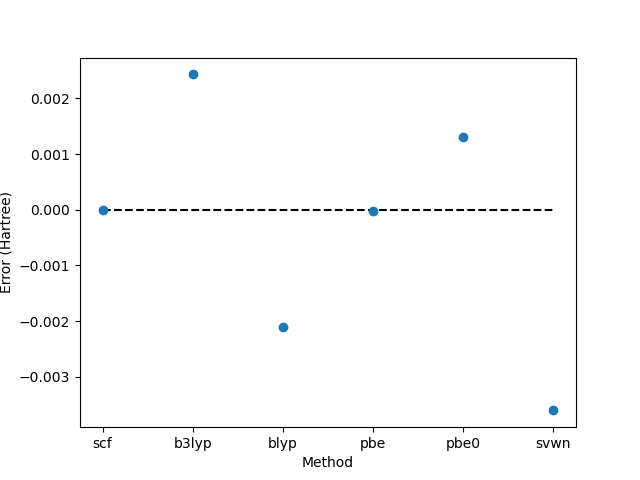

In [3]:
import psi4
import matplotlib.pyplot as plt

mol = psi4.geometry("""
0 2
H
""")
psi4.set_options({"reference": "uhf"})

e_exact = -0.5
methods = ["scf", "b3lyp", "blyp", "pbe", "pbe0", "svwn"]
energies = []

for m in methods:
    energies.append(psi4.energy(m + "/cc-pv5z"))
errors = e_exact - np.array(energies)
    
plt.figure()
plt.hlines(0, 0, len(methods)-1, color="black", ls="--") # reference line
plt.plot(range(len(methods)), errors, "o")
plt.gca().set_xticks(range(len(methods)))
plt.gca().set_xticklabels(methods)
plt.xlabel("Method")
plt.ylabel("Error (Hartree)")
plt.show()

## Performance of Density Functional Approximations

The following observations can be made about the various DFT methods from the analysis of various data sets of atomization energies:
- The hybrid and meta-GGA functionals are generally accurate in terms of the mean unsigned error and they are more efficient than correlated post-Hartree-Fock methods. However, the maximum absolute errors are larger for the DFT methods.
- Hybrid and meta-GGA functionals are preferred over pure DFT functionals.
- Increasing the basis set sizes does not necessarily improves the energy.
- GGA models are preferred over LDA models.

Regarding the prediction of geometries with DFT, the following observation can be made:
- DFT generally predicts good geometries for covalent molecules.
- Van der Waals complexes tend to have interfragment distances that are too large because of the lack of dispersion interactions in standard DFT methods.
- Hydrogen bonds are generally too short.

DFT significantly improves the description of transition metals compared to Hartree-Fock theory. Generally, DFT is less prone to errors in static correlation, which is expected to be sizable for transition metals. Inclusion of Hartree-Fock exchange increases the DFT error for systems with multireference charachter.

DFT generally suffers from "over-delocalization". Many functionals tend to overstablize systems with more highly delocalized densities over more localized alternatives. Thus, systems with higher symmetry are often preferred over lower symmetry systems. Mixing some Hartree-Fock exchange can improve the description. 

## Useful Resources

- Cramer, C. J. *Essentials of Computational Chemistry: Theories and Models*, 2nd ed.; John Wiley & Sons: Chichester, England, 2004. (Chapter 8)  
- Jensen, F. *Introduction to Computational Chemistry*, 3rd ed.; John Wiley & Sons: Nashville, TN, 2017. (Chapter 6)